## Exploración del corpus

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

##### Descarga de los datos

In [2]:
df = pd.read_json('Sports_and_Outdoors_5.json', lines = True)

In [3]:
df.shape

(296337, 9)

In [4]:
df = df.sample(1000, random_state = 17)
df.head()

asin helpful  overall  \
190306  B003J80XQG  [0, 0]        5   
29855   B000BT0Z9Q  [0, 2]        3   
168506  B002UK9WK2  [1, 2]        5   
206628  B0046O0PEC  [0, 2]        3   
251996  B006JYHHL6  [0, 0]        5   

                                               reviewText   reviewTime  \
190306  These lids are great for my 24 oz Tervis tumbl...  05 31, 2013   
29855   this piece of equipment seems like it is going...   07 9, 2009   
168506  This whistle is loud! Louder then the original...  08 17, 2012   
206628  Kinda just takes up space in my pack.  Don't r...  02 12, 2014   
251996  I bought this for my son for Christmas and onc...   07 7, 2013   

            reviewerID      reviewerName                  summary  \
190306  A3NXOKJ2HEV7OU           Airbare               Great lids   
29855   A1PSD2SHO6R8CD  Dennis W. Okeefe               It's solid   
168506  A27Y4OEC9MD9PA        George Wey          Fox Sonik Blast   
206628  A29IDH9HRAPN24      Kevin Millar  didn't really need this   
251996   ALUF42HEPEAZO    James Mayfield        Bought for my son   

        unixReviewTime  
190306      1369958400  
29855       1247097600  
168506      1345161600  
206628      1392163200  
251996      1373155200

##### Cardinalidad del vocabulario

In [5]:
import nltk
from nltk import TreebankWordTokenizer

In [6]:
# Tokenizamos cada review del dataset en frases
df_tokenized = df.apply(lambda row: nltk.sent_tokenize(row['reviewText'], language = 'english'), axis=1)
df_tokenized.head()

190306    [These lids are great for my 24 oz Tervis tumb...
29855     [this piece of equipment seems like it is goin...
168506    [This whistle is loud!, Louder then the origin...
206628    [Kinda just takes up space in my pack., Don't ...
251996    [I bought this for my son for Christmas and on...
dtype: object

In [7]:
# Tokenizamos cada frase en palabras y las almacenamos en una lista
tokenizer = TreebankWordTokenizer()

words = list()
for rev in df_tokenized.tolist():
    for sent in rev:
        for idx, word in enumerate(tokenizer.tokenize(sent)):
            print('Palabra {0:10}{1:20}'.format(str(idx), word))
            words.append(word.lower())

Palabra 0         These               
Palabra 1         lids                
Palabra 2         are                 
Palabra 3         great               
Palabra 4         for                 
Palabra 5         my                  
Palabra 6         24                  
Palabra 7         oz                  
Palabra 8         Tervis              
Palabra 9         tumbler             
Palabra 10        .                   
Palabra 0         They                
Palabra 1         work                
Palabra 2         well                
Palabra 3         on                  
Palabra 4         car                 
Palabra 5         trips               
Palabra 6         ,                   
Palabra 7         or                  
Palabra 8         just                
Palabra 9         around              
Palabra 10        the                 
Palabra 11        house               
Palabra 12        to                  
Palabra 13        prevent             
Palabra 14        spills 

Palabra 0         I                   
Palabra 1         have                
Palabra 2         n't                 
Palabra 3         really              
Palabra 4         had                 
Palabra 5         any                 
Palabra 6         problems            
Palabra 7         with                
Palabra 8         opening             
Palabra 9         the                 
Palabra 10        cover               
Palabra 11        because             
Palabra 12        I                   
Palabra 13        normally            
Palabra 14        am                  
Palabra 15        stopped             
Palabra 16        when                
Palabra 17        I                   
Palabra 18        take                
Palabra 19        a                   
Palabra 20        drink               
Palabra 21        and                 
Palabra 22        it                  
Palabra 23        can                 
Palabra 24        be                  
Palabra 25        easily 

Palabra 1         nalgene             
Palabra 2         plastic             
Palabra 3         that                
Palabra 4         you                 
Palabra 5         dont                
Palabra 6         have                
Palabra 7         to                  
Palabra 8         worry               
Palabra 9         about               
Palabra 10        breaking            
Palabra 11        if                  
Palabra 12        dropped             
Palabra 13        on                  
Palabra 14        a                   
Palabra 15        rock                
Palabra 16        or                  
Palabra 17        other               
Palabra 18        hard                
Palabra 19        surface             
Palabra 20        .                   
Palabra 0         They                
Palabra 1         also                
Palabra 2         work                
Palabra 3         great               
Palabra 4         in                  
Palabra 5         the    

Palabra 4         to                  
Palabra 5         inhale              
Palabra 6         the                 
Palabra 7         fumes               
Palabra 8         and                 
Palabra 9         do                  
Palabra 10        your                
Palabra 11        best                
Palabra 12        to                  
Palabra 13        minimize            
Palabra 14        skin                
Palabra 15        contact             
Palabra 16        .                   
Palabra 0         I                   
Palabra 1         used                
Palabra 2         this                
Palabra 3         to                  
Palabra 4         re-grip             
Palabra 5         my                  
Palabra 6         pistols             
Palabra 7         and                 
Palabra 8         a                   
Palabra 9         shotgun             
Palabra 10        .                   
Palabra 0         Very                
Palabra 1         adhesiv

Palabra 19        on                  
Palabra 20        it                  
Palabra 21        .                   
Palabra 0         Other               
Palabra 1         than                
Palabra 2         that                
Palabra 3         it                  
Palabra 4         is                  
Palabra 5         a                   
Palabra 6         great               
Palabra 7         jig                 
Palabra 8         and                 
Palabra 9         gives               
Palabra 10        my                  
Palabra 11        mister              
Palabra 12        twisters            
Palabra 13        excellent           
Palabra 14        life                
Palabra 15        !                   
Palabra 0         Used                
Palabra 1         for                 
Palabra 2         walleye             
Palabra 3         season              
Palabra 4         in                  
Palabra 5         Michigan            
Palabra 6         and    

Palabra 3         .22                 
Palabra 4         rounds              
Palabra 5         can                 
Palabra 6         be                  
Palabra 7         time                
Palabra 8         consuming           
Palabra 9         ,                   
Palabra 10        especially          
Palabra 11        in                  
Palabra 12        low                 
Palabra 13        light               
Palabra 14        conditions          
Palabra 15        .                   
Palabra 0         This                
Palabra 1         speedloader         
Palabra 2         has                 
Palabra 3         made                
Palabra 4         the                 
Palabra 5         job                 
Palabra 6         much                
Palabra 7         simpler             
Palabra 8         .                   
Palabra 0         A                   
Palabra 1         great               
Palabra 2         value               
Palabra 3         for    

Palabra 4         bottle              
Palabra 5         be                  
Palabra 6         open                
Palabra 7         &                   
Palabra 8         not                 
Palabra 9         spill               
Palabra 10        or                  
Palabra 11        leak                
Palabra 12        when                
Palabra 13        turned              
Palabra 14        upside              
Palabra 15        down                
Palabra 16        ?                   
Palabra 0         I                   
Palabra 1         'm                  
Palabra 2         still               
Palabra 3         trying              
Palabra 4         to                  
Palabra 5         figure              
Palabra 6         this                
Palabra 7         one                 
Palabra 8         out                 
Palabra 9         .                   
Palabra 0         According           
Palabra 1         to                  
Palabra 2         the    

Palabra 2         be                  
Palabra 3         a                   
Palabra 4         toy                 
Palabra 5         ,                   
Palabra 6         but                 
Palabra 7         always              
Palabra 8         use                 
Palabra 9         eye                 
Palabra 10        protection          
Palabra 11        .                   
Palabra 0         Replaced            
Palabra 1         the                 
Palabra 2         flat                
Palabra 3         ,                   
Palabra 4         stock               
Palabra 5         trigger             
Palabra 6         guard               
Palabra 7         on                  
Palabra 8         a                   
Palabra 9         Sig                 
Palabra 10        Sauer               
Palabra 11        Sig516              
Palabra 12        .                   
Palabra 0         The                 
Palabra 1         slight              
Palabra 2         curve  

Palabra 4         and                 
Palabra 5         they                
Palabra 6         work                
Palabra 7         great               
Palabra 8         .                   
Palabra 0         If                  
Palabra 1         I                   
Palabra 2         had                 
Palabra 3         realized            
Palabra 4         that                
Palabra 5         these               
Palabra 6         things              
Palabra 7         were                
Palabra 8         available           
Palabra 9         for                 
Palabra 10        this                
Palabra 11        low                 
Palabra 12        price               
Palabra 13        ,                   
Palabra 14        I                   
Palabra 15        would               
Palabra 16        have                
Palabra 17        gotten              
Palabra 18        them                
Palabra 19        years               
Palabra 20        ago.If 

Palabra 6         as                  
Palabra 7         a                   
Palabra 8         shirt               
Palabra 9         by                  
Palabra 10        itself              
Palabra 11        ,                   
Palabra 12        no                  
Palabra 13        under               
Palabra 14        shirt               
Palabra 15        then                
Palabra 16        1                   
Palabra 17        size                
Palabra 18        larger              
Palabra 19        may                 
Palabra 20        work                
Palabra 21        OK                  
Palabra 22        .                   
Palabra 0         I                   
Palabra 1         'm                  
Palabra 2         6'3                 
Palabra 3         215                 
Palabra 4         and                 
Palabra 5         got                 
Palabra 6         the                 
Palabra 7         1X                  
Palabra 8         .      

Palabra 81        successfully        
Palabra 82        ,                   
Palabra 83        yes                 
Palabra 84        it                  
Palabra 85        sounds              
Palabra 86        good                
Palabra 87        when                
Palabra 88        everything          
Palabra 89        is                  
Palabra 90        engaged             
Palabra 91        and                 
Palabra 92        connected           
Palabra 93        ,                   
Palabra 94        have                
Palabra 95        not                 
Palabra 96        tested              
Palabra 97        it                  
Palabra 98        in                  
Palabra 99        my                  
Palabra 100       planned             
Palabra 101       use                 
Palabra 102       so                  
Palabra 103       for                 
Palabra 104       now                 
Palabra 105       it                  
Palabra 106       is     

Palabra 5         not                 
Palabra 6         sure                
Palabra 7         how                 
Palabra 8         you                 
Palabra 9         can                 
Palabra 10        beat                
Palabra 11        this                
Palabra 12        scope               
Palabra 13        .                   
Palabra 0         works               
Palabra 1         great               
Palabra 2         ,                   
Palabra 3         no                  
Palabra 4         spots               
Palabra 5         (                   
Palabra 6         a                   
Palabra 7         year                
Palabra 8         out                 
Palabra 9         )                   
Palabra 10        still               
Palabra 11        use                 
Palabra 12        the                 
Palabra 13        same                
Palabra 14        batteries           
Palabra 15        ,                   
Palabra 16        accurat

Palabra 4         used                
Palabra 5         with                
Palabra 6         a                   
Palabra 7         molle               
Palabra 8         system              
Palabra 9         or                  
Palabra 10        on                  
Palabra 11        a                   
Palabra 12        belt                
Palabra 13        .                   
Palabra 0         I                   
Palabra 1         use                 
Palabra 2         it                  
Palabra 3         on                  
Palabra 4         my                  
Palabra 5         belt                
Palabra 6         daily               
Palabra 7         and                 
Palabra 8         it                  
Palabra 9         fits                
Palabra 10        securely            
Palabra 11        with                
Palabra 12        minimal             
Palabra 13        movement.Now        
Palabra 14        ,                   
Palabra 15        the    

Palabra 29        of                  
Palabra 30        the                 
Palabra 31        chamois             
Palabra 32        -                   
Palabra 33        the                 
Palabra 34        AirGel              
Palabra 35        is                  
Palabra 36        hands               
Palabra 37        down                
Palabra 38        the                 
Palabra 39        best                
Palabra 40        ,                   
Palabra 41        especially          
Palabra 42        for                 
Palabra 43        long                
Palabra 44        rides               
Palabra 45        .                   
Palabra 0         I                   
Palabra 1         've                 
Palabra 2         worn                
Palabra 3         this                
Palabra 4         bib                 
Palabra 5         on                  
Palabra 6         multiple            
Palabra 7         metric              
Palabra 8         centuri

Palabra 23        )                   
Palabra 24        impractical         
Palabra 25        size                
Palabra 26        for                 
Palabra 27        utility             
Palabra 28        useI                
Palabra 29        am                  
Palabra 30        now                 
Palabra 31        pleased             
Palabra 32        with                
Palabra 33        this                
Palabra 34        purchase            
Palabra 35        but                 
Palabra 36        in                  
Palabra 37        hindsight           
Palabra 38        I                   
Palabra 39        would               
Palabra 40        have                
Palabra 41        purchased           
Palabra 42        a                   
Palabra 43        different           
Palabra 44        knife               
Palabra 45        .                   
Palabra 0         The                 
Palabra 1         knife               
Palabra 2         itself 

Palabra 15        range               
Palabra 16        .                   
Palabra 0         Engages             
Palabra 1         nicely              
Palabra 2         and                 
Palabra 3         is                  
Palabra 4         easy                
Palabra 5         to                  
Palabra 6         use                 
Palabra 7         ,                   
Palabra 8         but                 
Palabra 9         the                 
Palabra 10        tines               
Palabra 11        break               
Palabra 12        off                 
Palabra 13        very                
Palabra 14        easily              
Palabra 15        .                   
Palabra 0         Basically           
Palabra 1         this                
Palabra 2         is                  
Palabra 3         not                 
Palabra 4         quite               
Palabra 5         strong              
Palabra 6         enough              
Palabra 7         .      

Palabra 8         that                
Palabra 9         I                   
Palabra 10        did                 
Palabra 11        n't                 
Palabra 12        have                
Palabra 13        to                  
Palabra 14        sharpen             
Palabra 15        ,                   
Palabra 16        it                  
Palabra 17        comes               
Palabra 18        wicked              
Palabra 19        sharp               
Palabra 20        .                   
Palabra 0         And                 
Palabra 1         it                  
Palabra 2         stays               
Palabra 3         that                
Palabra 4         way                 
Palabra 5         ,                   
Palabra 6         I                   
Palabra 7         have                
Palabra 8         yet                 
Palabra 9         to                  
Palabra 10        need                
Palabra 11        to                  
Palabra 12        sharpen

Palabra 5         a                   
Palabra 6         lanyard             
Palabra 7         before              
Palabra 8         ,                   
Palabra 9         I                   
Palabra 10        'd                  
Palabra 11        suggest             
Palabra 12        checking            
Palabra 13        these               
Palabra 14        instructions        
Palabra 15        as                  
Palabra 16        they                
Palabra 17        really              
Palabra 18        are                 
Palabra 19        simple.I            
Palabra 20        made                
Palabra 21        lanyards            
Palabra 22        for                 
Palabra 23        4                   
Palabra 24        knives              
Palabra 25        and                 
Palabra 26        a                   
Palabra 27        multi-tool          
Palabra 28        and                 
Palabra 29        still               
Palabra 30        have   

Palabra 2         the                 
Palabra 3         hopper              
Palabra 4         system.-            
Palabra 5         Cheap               
Palabra 6         build               
Palabra 7         quality             
Palabra 8         is                  
Palabra 9         barely              
Palabra 10        better              
Palabra 11        than                
Palabra 12        the                 
Palabra 13        toys                
Palabra 14        I                   
Palabra 15        find                
Palabra 16        at                  
Palabra 17        the                 
Palabra 18        Dollar              
Palabra 19        Tree.-              
Palabra 20        To                  
Palabra 21        fire                
Palabra 22        ,                   
Palabra 23        the                 
Palabra 24        ``                  
Palabra 25        safety              
Palabra 26        ''                  
Palabra 27        must   

Palabra 23        and                 
Palabra 24        quality             
Palabra 25        are                 
Palabra 26        consistent          
Palabra 27        with                
Palabra 28        the                 
Palabra 29        productis           
Palabra 30        an                  
Palabra 31        excellent           
Palabra 32        product             
Palabra 33        I                   
Palabra 34        am                  
Palabra 35        satisfied           
Palabra 36        with                
Palabra 37        their               
Palabra 38        quality             
Palabra 39        and                 
Palabra 40        durability          
Palabra 41        recommend           
Palabra 42        price               
Palabra 43        is                  
Palabra 44        excellent           
Palabra 45        quality             
Palabra 46        .                   
Palabra 0         very                
Palabra 1         pleased

Palabra 0         A                   
Palabra 1         few                 
Palabra 2         clips               
Palabra 3         were                
Palabra 4         difficult           
Palabra 5         to                  
Palabra 6         load                
Palabra 7         but                 
Palabra 8         overall             
Palabra 9         I                   
Palabra 10        am                  
Palabra 11        very                
Palabra 12        pleased             
Palabra 13        to                  
Palabra 14        get                 
Palabra 15        my                  
Palabra 16        ammo                
Palabra 17        organized           
Palabra 18        .                   
Palabra 0         I                   
Palabra 1         prefer              
Palabra 2         this                
Palabra 3         stove               
Palabra 4         to                  
Palabra 5         the                 
Palabra 6         propane

Palabra 4         like                
Palabra 5         the                 
Palabra 6         sheath              
Palabra 7         and                 
Palabra 8         the                 
Palabra 9         style               
Palabra 10        of                  
Palabra 11        the                 
Palabra 12        weapon              
Palabra 13        ,                   
Palabra 14        go                  
Palabra 15        for                 
Palabra 16        it                  
Palabra 17        .                   
Palabra 0         Just                
Palabra 1         be                  
Palabra 2         prepared            
Palabra 3         to                  
Palabra 4         modify              
Palabra 5         it                  
Palabra 6         to                  
Palabra 7         improve             
Palabra 8         the                 
Palabra 9         grip                
Palabra 10        .                   
Palabra 0         Absolut

Palabra 2         it                  
Palabra 3         on                  
Palabra 4         the                 
Palabra 5         clothes             
Palabra 6         ,                   
Palabra 7         they                
Palabra 8         had                 
Palabra 9         very                
Palabra 10        prominent           
Palabra 11        run                 
Palabra 12        and                 
Palabra 13        drip                
Palabra 14        marks               
Palabra 15        all                 
Palabra 16        over                
Palabra 17        them                
Palabra 18        .                   
Palabra 0         But                 
Palabra 1         once                
Palabra 2         dried               
Palabra 3         ,                   
Palabra 4         they                
Palabra 5         vanished            
Palabra 6         and                 
Palabra 7         it                  
Palabra 8         left   

Palabra 4         help                
Palabra 5         hold                
Palabra 6         it                  
Palabra 7         in                  
Palabra 8         place               
Palabra 9         ,                   
Palabra 10        but                 
Palabra 11        other               
Palabra 12        than                
Palabra 13        that                
Palabra 14        it                  
Palabra 15        just                
Palabra 16        hangs               
Palabra 17        in                  
Palabra 18        the                 
Palabra 19        main                
Palabra 20        compartment         
Palabra 21        .                   
Palabra 0         I                   
Palabra 1         read                
Palabra 2         several             
Palabra 3         reviews             
Palabra 4         of                  
Palabra 5         people              
Palabra 6         saying              
Palabra 7         &      

Palabra 21        did                 
Palabra 22        n't                 
Palabra 23        even                
Palabra 24        have                
Palabra 25        to                  
Palabra 26        replace             
Palabra 27        my                  
Palabra 28        brake               
Palabra 29        and                 
Palabra 30        gear                
Palabra 31        cables              
Palabra 32        as                  
Palabra 33        they                
Palabra 34        were                
Palabra 35        plenty              
Palabra 36        long                
Palabra 37        enough              
Palabra 38        .                   
Palabra 0         The                 
Palabra 1         difference          
Palabra 2         was                 
Palabra 3         night               
Palabra 4         and                 
Palabra 5         day                 
Palabra 6         ,                   
Palabra 7         let    

Palabra 13        one                 
Palabra 14        outdoors            
Palabra 15        .                   
Palabra 0         This                
Palabra 1         gun                 
Palabra 2         has                 
Palabra 3         never               
Palabra 4         failed              
Palabra 5         to                  
Palabra 6         work                
Palabra 7         as                  
Palabra 8         intended            
Palabra 9         .                   
Palabra 0         It                  
Palabra 1         's                  
Palabra 2         got                 
Palabra 3         a                   
Palabra 4         very                
Palabra 5         satisfying          
Palabra 6         pop                 
Palabra 7         to                  
Palabra 8         it                  
Palabra 9         when                
Palabra 10        it                  
Palabra 11        shoots              
Palabra 12        .      

Palabra 13        that                
Palabra 14        counts.Overall      
Palabra 15        ,                   
Palabra 16        this                
Palabra 17        is                  
Palabra 18        a                   
Palabra 19        great               
Palabra 20        cooking             
Palabra 21        set                 
Palabra 22        and                 
Palabra 23        is                  
Palabra 24        worthy              
Palabra 25        of                  
Palabra 26        purchasing          
Palabra 27        and                 
Palabra 28        adding              
Palabra 29        to                  
Palabra 30        your                
Palabra 31        cooking             
Palabra 32        kit                 
Palabra 33        .                   
Palabra 0         Comparing           
Palabra 1         Condor              
Palabra 2         gear                
Palabra 3         to                  
Palabra 4         a      

Palabra 4         and                 
Palabra 5         hit                 
Palabra 6         the                 
Palabra 7         trails              
Palabra 8         hard                
Palabra 9         .                   
Palabra 0         It                  
Palabra 1         stayed              
Palabra 2         in                  
Palabra 3         place               
Palabra 4         and                 
Palabra 5         did                 
Palabra 6         n't                 
Palabra 7         cause               
Palabra 8         any                 
Palabra 9         issues              
Palabra 10        while               
Palabra 11        riding              
Palabra 12        .                   
Palabra 0         The                 
Palabra 1         pocket              
Palabra 2         is                  
Palabra 3         pretty              
Palabra 4         darn                
Palabra 5         tiny                
Palabra 6         but    

Palabra 13        solid               
Palabra 14        ,                   
Palabra 15        nice                
Palabra 16        looking             
Palabra 17        helmet              
Palabra 18        with                
Palabra 19        good                
Palabra 20        ventilation         
Palabra 21        and                 
Palabra 22        sturdy              
Palabra 23        materials           
Palabra 24        .                   
Palabra 0         bought              
Palabra 1         this                
Palabra 2         to                  
Palabra 3         put                 
Palabra 4         on                  
Palabra 5         my                  
Palabra 6         paint               
Palabra 7         ball                
Palabra 8         chat                
Palabra 9         rig                 
Palabra 10        for                 
Palabra 11        playing             
Palabra 12        paintball           
Palabra 13        .      

Palabra 2         clip                
Palabra 3         shows               
Palabra 4         that                
Palabra 5         it                  
Palabra 6         is                  
Palabra 7         made                
Palabra 8         in                  
Palabra 9         U.S.A.              
Palabra 10        by                  
Palabra 11        Tactical            
Palabra 12        Taylor              
Palabra 13        .                   
Palabra 0         My                  
Palabra 1         impression          
Palabra 2         is                  
Palabra 3         that                
Palabra 4         it                  
Palabra 5         will                
Palabra 6         last                
Palabra 7         for                 
Palabra 8         many                
Palabra 9         years               
Palabra 10        of                  
Palabra 11        normal              
Palabra 12        use                 
Palabra 13        .      

Palabra 2         n't                 
Palabra 3         even                
Palabra 4         know                
Palabra 5         it                  
Palabra 6         's                  
Palabra 7         in                  
Palabra 8         my                  
Palabra 9         pocket              
Palabra 10        .                   
Palabra 0         It                  
Palabra 1         is                  
Palabra 2         very                
Palabra 3         easily              
Palabra 4         deployed            
Palabra 5         with                
Palabra 6         one                 
Palabra 7         hand                
Palabra 8         and                 
Palabra 9         retracted           
Palabra 10        with                
Palabra 11        one                 
Palabra 12        hand                
Palabra 13        .                   
Palabra 0         I                   
Palabra 1         gave                
Palabra 2         it     

Palabra 4         punch               
Palabra 5         as                  
Palabra 6         well                
Palabra 7         ,                   
Palabra 8         it                  
Palabra 9         's                  
Palabra 10        easy                
Palabra 11        to                  
Palabra 12        see                 
Palabra 13        whey                
Palabra 14        they                
Palabra 15        were                
Palabra 16        described           
Palabra 17        as                  
Palabra 18        if                  
Palabra 19        missing             
Palabra 20        sticking            
Palabra 21        in                  
Palabra 22        an                  
Palabra 23        opponent            
Palabra 24        they                
Palabra 25        could               
Palabra 26        easily              
Palabra 27        stun                
Palabra 28        someone             
Palabra 29        .      

Palabra 13        have                
Palabra 14        absolutly           
Palabra 15        no                  
Palabra 16        function            
Palabra 17        .                   
Palabra 0         These               
Palabra 1         nightsets           
Palabra 2         are                 
Palabra 3         the                 
Palabra 4         best                
Palabra 5         out                 
Palabra 6         there               
Palabra 7         .                   
Palabra 0         All                 
Palabra 1         the                 
Palabra 2         other               
Palabra 3         colered             
Palabra 4         night               
Palabra 5         sights              
Palabra 6         are                 
Palabra 7         useless             
Palabra 8         in                  
Palabra 9         the                 
Palabra 10        day                 
Palabra 11        they                
Palabra 12        get    

Palabra 1         Rock                
Palabra 2         was                 
Palabra 3         prompt              
Palabra 4         on                  
Palabra 5         delivery            
Palabra 6         and                 
Palabra 7         this                
Palabra 8         is                  
Palabra 9         an                  
Palabra 10        accurate            
Palabra 11        little              
Palabra 12        red                 
Palabra 13        dot                 
Palabra 14        scope               
Palabra 15        .                   
Palabra 0         Some                
Palabra 1         of                  
Palabra 2         you                 
Palabra 3         may                 
Palabra 4         want                
Palabra 5         to                  
Palabra 6         put                 
Palabra 7         a                   
Palabra 8         riser               
Palabra 9         under               
Palabra 10        it     

Palabra 28        certainly           
Palabra 29        love                
Palabra 30        the                 
Palabra 31        variation           
Palabra 32        .                   
Palabra 0         16                  
Palabra 1         workouts            
Palabra 2         (                   
Palabra 3         17                  
Palabra 4         if                  
Palabra 5         you                 
Palabra 6         buy                 
Palabra 7         from                
Palabra 8         me                  
Palabra 9         in                  
Palabra 10        TEAMbeachbody.com/katyanne15
Palabra 11        )                   
Palabra 12        I                   
Palabra 13        love                
Palabra 14        that                
Palabra 15        all                 
Palabra 16        the                 
Palabra 17        moves               
Palabra 18        are                 
Palabra 19        using               
Palabra 20       

Palabra 6         that                
Palabra 7         will                
Palabra 8         fit                 
Palabra 9         an                  
Palabra 10        adult               
Palabra 11        hand                
Palabra 12        .                   
Palabra 0         If                  
Palabra 1         you                 
Palabra 2         have                
Palabra 3         pre-2010            
Palabra 4         Shimano             
Palabra 5         STI                 
Palabra 6         levers              
Palabra 7         ...                 
Palabra 8         ...                 
Palabra 9         GET                 
Palabra 10        THIS                
Palabra 11        !                   
Palabra 0         It                  
Palabra 1         stays               
Palabra 2         put                 
Palabra 3         (                   
Palabra 4         Does                
Palabra 5         n't                 
Palabra 6         get    

Palabra 1         has                 
Palabra 2         a                   
Palabra 3         wonderful           
Palabra 4         cooling             
Palabra 5         sensation           
Palabra 6         on                  
Palabra 7         the                 
Palabra 8         skin                
Palabra 9         .                   
Palabra 0         And                 
Palabra 1         the                 
Palabra 2         cooling             
Palabra 3         does                
Palabra 4         last                
Palabra 5         a                   
Palabra 6         little              
Palabra 7         while.Sadly         
Palabra 8         ,                   
Palabra 9         the                 
Palabra 10        muscles             
Palabra 11        it                  
Palabra 12        is                  
Palabra 13        trying              
Palabra 14        to                  
Palabra 15        treat               
Palabra 16        are    

Palabra 208       taste               
Palabra 209       is                  
Palabra 210       the                 
Palabra 211       plastic             
Palabra 212       of                  
Palabra 213       the                 
Palabra 214       bottle              
Palabra 215       (                   
Palabra 216       which               
Palabra 217       is                  
Palabra 218       not                 
Palabra 219       apparently          
Palabra 220       diminished          
Palabra 221       by                  
Palabra 222       the                 
Palabra 223       filter              
Palabra 224       )                   
Palabra 225       ,                   
Palabra 226       even                
Palabra 227       after               
Palabra 228       several             
Palabra 229       washes              
Palabra 230       .                   
Palabra 0         (                   
Palabra 1         Note                
Palabra 2         :      

Palabra 388       Tomahawk            
Palabra 389       '                   
Palabra 390       ...                 
Palabra 391       were                
Palabra 392       the                 
Palabra 393       old                 
Palabra 394       ones                
Palabra 395       showing             
Palabra 396       the                 
Palabra 397       old                 
Palabra 398       model               
Palabra 399       .                   
Palabra 0         Shorts              
Palabra 1         fit                 
Palabra 2         as                  
Palabra 3         expected            
Palabra 4         and                 
Palabra 5         they                
Palabra 6         also                
Palabra 7         breathe             
Palabra 8         well                
Palabra 9         and                 
Palabra 10        comes               
Palabra 11        at                  
Palabra 12        a                   
Palabra 13        good   

Palabra 136       nice                
Palabra 137       if                  
Palabra 138       designed            
Palabra 139       to                  
Palabra 140       save                
Palabra 141       more                
Palabra 142       than                
Palabra 143       one                 
Palabra 144       reading             
Palabra 145       per                 
Palabra 146       session             
Palabra 147       as                  
Palabra 148       it                  
Palabra 149       would               
Palabra 150       prove               
Palabra 151       more                
Palabra 152       useful              
Palabra 153       as                  
Palabra 154       when                
Palabra 155       wanting             
Palabra 156       to                  
Palabra 157       synchronize         
Palabra 158       speed               
Palabra 159       readings            
Palabra 160       to                  
Palabra 161       video  

In [8]:
# Al usar set nos muestra únicamente las palabras únicas
set(words)

{'dots',
 '8mm',
 'molly',
 'subtracted',
 'surprised',
 'exit',
 'improvise',
 'degrades',
 'travel',
 'clean/skin',
 'nicest',
 'rocket-science',
 'soak',
 'toss',
 'critical',
 '!',
 'knitted',
 'aerobars',
 'guy',
 'burnedi',
 'attached',
 'devour',
 'transferred',
 'cold/damp',
 'longest',
 'dense',
 'finned',
 'block',
 'sp8',
 'do',
 'continued',
 'hi-tech',
 'elements',
 'wishmovies',
 'pack',
 'player',
 '1/16',
 '.this',
 'elsewhere',
 'mug.if',
 'one.the',
 'up.very',
 'hopes',
 'words',
 'dependable',
 'friction',
 'girls',
 'simular',
 'poles',
 'alternatives',
 'apparently',
 'holiday',
 'plus',
 'bagi',
 "'nough",
 'model',
 'machete',
 'after',
 'become',
 'lightly',
 'several',
 'insecure',
 'hitch.only',
 'auto',
 'joined',
 'results.of',
 'flashing',
 'aggressive.all',
 'math',
 'thankful',
 'minor',
 'springs',
 'on/off',
 'angry',
 'me.well',
 'trike',
 'forrest',
 'undone',
 'fall/drop',
 'comparing',
 'turret',
 'quicker',
 'keyspumpsparei',
 'milk',
 'ankle',
 '

In [9]:
print("La cardinalidad del vocabulario es: " + str(len(set(words))))

La cardinalidad del vocabulario es: 8800


##### Distribución de las reviews

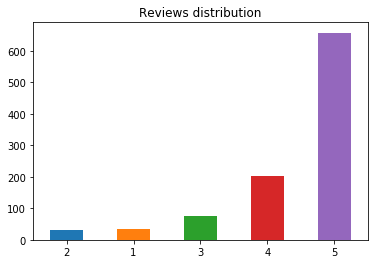

In [10]:
df['overall'].value_counts(ascending = True).plot('bar', title = 'Reviews distribution', rot = 0)

Como podemos comprobar, hay muchas nás reviews de 5 estrellas que de las demás, por lo que, hagamos una clasificación binaria o multiclase, vamos a tener un problema de desbalanceo

##### Número de reviews positivas y negativas

Vamos a entender reviews positivas comoo aquellas que tienen 3 o más estrellas y como reviews negativas aquellas con 1 o 2 estrellas

In [11]:
print("Número de reviews positivas: " + str((df['overall'] >= 3).sum()))
print("Número de reviews negativas: " + str((df['overall'] < 3).sum()))

Número de reviews positivas: 934
Número de reviews negativas: 66


##### N-grams más frecuentes

In [12]:
from nltk import ngrams
from nltk.probability import FreqDist

In [13]:
bigrams_ = list(ngrams(words, 2))
trigrams_ = list(ngrams(words, 3))
tetragrams_ = list(ngrams(words, 4))

In [14]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)
ttg_freq = FreqDist(tetragrams_)

In [15]:
bg_freq.most_common(10)

[(('.', 'i'), 992),
 (('.', 'the'), 426),
 (('.', 'it'), 385),
 ((',', 'but'), 318),
 (('of', 'the'), 309),
 ((',', 'and'), 295),
 (('in', 'the'), 293),
 (('.', 'this'), 280),
 ((',', 'i'), 257),
 (('it', 'is'), 254)]

In [16]:
tg_freq.most_common(10)

[(('.', 'this', 'is'), 99),
 (('.', 'i', 'have'), 93),
 (('.', 'it', "'s"), 86),
 (('.', 'it', 'is'), 73),
 (('this', 'is', 'a'), 73),
 (('i', 'do', "n't"), 72),
 (('&', '#', '34'), 70),
 (('#', '34', ';'), 70),
 ((',', 'but', 'i'), 58),
 (('.', 'if', 'you'), 57)]

In [17]:
ttg_freq.most_common(10)

[(('&', '#', '34', ';'), 70),
 (('.', 'this', 'is', 'a'), 40),
 (('.', 'i', 'bought', 'this'), 30),
 (('!', '!', '!', '!'), 29),
 (('.', 'i', 'do', "n't"), 22),
 (('for', 'the', 'price', '.'), 22),
 (('this', 'is', 'a', 'great'), 21),
 (('out', 'of', 'the', 'box'), 19),
 (('.', 'this', 'is', 'the'), 15),
 (('.', 'if', 'you', 'have'), 15)]

In [18]:
bg_freq_most_common = bg_freq.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = tg_freq.most_common(10)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

ttg_freq_most_common = ttg_freq.most_common(10)
ttgs_ = [str(ttg[0]) for ttg in ttg_freq_most_common]
ttgs_f_ = [ttg[1] for ttg in ttg_freq_most_common]

In [19]:
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))
ttgs_f_, ttgs_ = zip(*sorted(zip(ttgs_f_, ttgs_)))

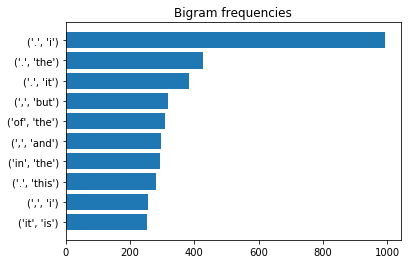

In [20]:
plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

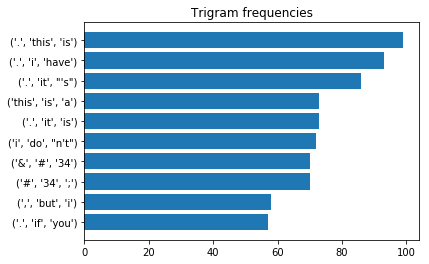

In [21]:
plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

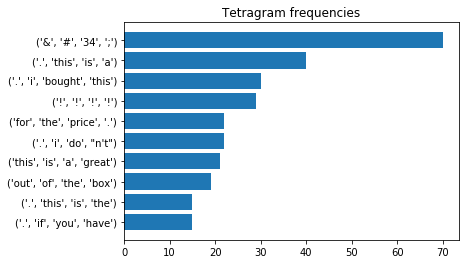

In [22]:
plt.barh(ttgs_, ttgs_f_)
plt.title('Tetragram frequencies')
plt.show()

Comoo no hemos realizado ningún preprocesado previo (se hará en el siguiente apartado), vemos que muchos n-gramas contienen signos de puntuación o palabras que no aportan mucho.

Una manera de corregir esto sería eliminar estos mismos tokens del vocabulario.

##### Nubes de palabras

In [23]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [24]:
sw_list = stopwords.words('english')

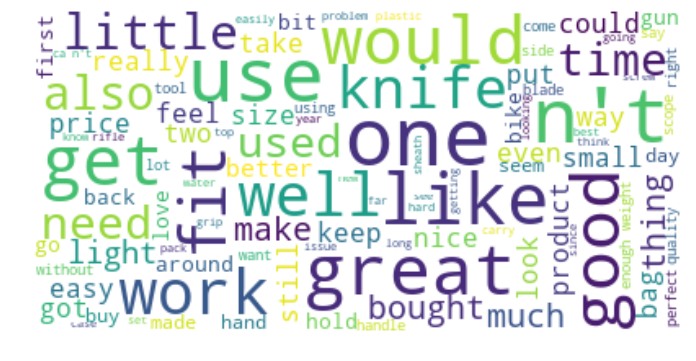

In [25]:
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white", stopwords = sw_list).generate(' '.join(words))
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Con afán de mostrar palabras algo más representativas, se ha eliminado una lista de stop words predefinida previamente descargada.
Aún así vemos que se podrían seguir eliminando más palabras como "n´t"o "get", que no aportan demasiado.

##### Visualización de word embeddings

In [29]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [30]:
file2write = open("corpues.txt",'w')
file2write.write(df['reviewText'].str.cat().lower())
file2write.close()

In [31]:
corpues = LineSentence('corpues.txt')

In [32]:
w2v = Word2Vec(min_count = 1, vector_size = 30, window = 5, sg = 1)

In [33]:
w2v.build_vocab(corpues)

In [34]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v.wv)))

Vocabulario compuesto por 12995 palabras


In [35]:
w2v.train(corpues, total_examples = w2v.corpus_count, epochs = 100)

(6479827, 8593200)

In [36]:
w2v.wv.most_similar('bag')

[('bag),', 0.8023176789283752),
 ('(every', 0.8018515706062317),
 ('crush', 0.7882811427116394),
 ('(everyday', 0.7762807011604309),
 ('(get', 0.7733539342880249),
 ('me.-', 0.7680782079696655),
 ('carry)', 0.7629523277282715),
 ('messenger', 0.7563833594322205),
 ('winner!', 0.7508771419525146),
 ('gym', 0.7392184734344482)]

In [37]:
w2v.wv.most_similar('hockey')

[('balls,', 0.8701867461204529),
 ('practical.', 0.8556901812553406),
 ('for.they', 0.8436243534088135),
 ('realistic', 0.8182928562164307),
 ("'specific'", 0.8089085221290588),
 ('treatments', 0.8061724901199341),
 ('careful,', 0.7886964082717896),
 ('preparingfor', 0.7854747772216797),
 ('what', 0.7831867337226868),
 ('about.just', 0.7807639837265015)]

In [38]:
w2v.wv.most_similar('good')

[('value', 0.8106529116630554),
 ('reinforce', 0.8101112246513367),
 ('loocking,', 0.7953618764877319),
 ('non-fire', 0.7916963696479797),
 ('price.sighted', 0.7916694283485413),
 ('breakfast,', 0.7880999445915222),
 ('thing.i', 0.7771232724189758),
 ('scratch-made', 0.7694185972213745),
 ('headed', 0.7651877403259277),
 ('purchase.these', 0.7625041007995605)]

In [39]:
w2v.wv.most_similar('soccer')

[('basketball.', 0.8256525993347168),
 ('cones,', 0.8184390068054199),
 ('august,', 0.7928507924079895),
 ('roads', 0.7689694762229919),
 ('weekends', 0.7667609453201294),
 ('happier...i', 0.7498971819877625),
 ('country', 0.7444862723350525),
 ('i.', 0.7409131526947021),
 ('also.its', 0.7344778180122375),
 ('kids.', 0.7287464737892151)]

In [40]:
keys = ['bag', 'hockey', 'good', 'soccer']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v.wv.most_similar(word, topn = 10):
        words.append(similar_word)
        embeddings.append(w2v.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [41]:
from sklearn.manifold import TSNE

tsne_model_2d = TSNE(perplexity = 15, n_components = 2, init = 'pca', n_iter = 3500, random_state = 32)

In [42]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [43]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

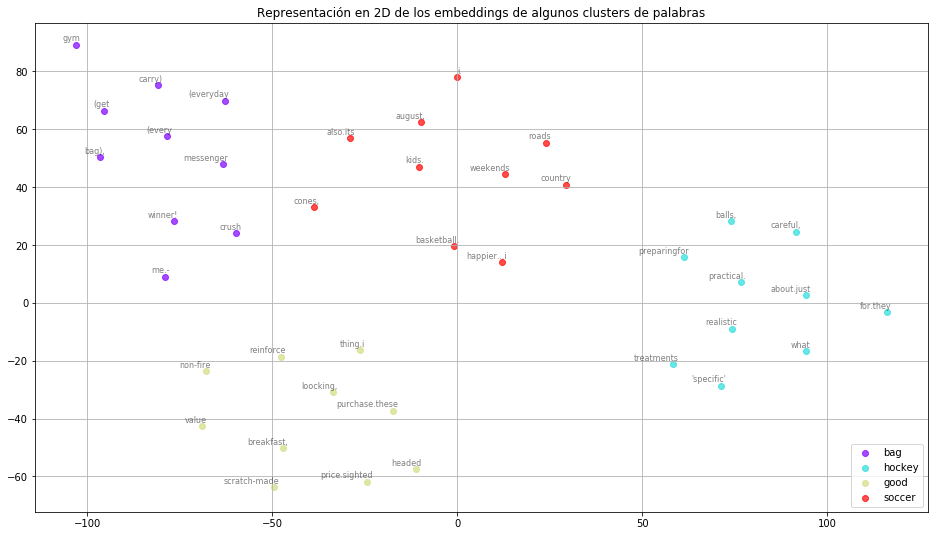

In [44]:
import matplotlib.cm as cm

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a = 0.7):
    plt.figure(figsize = (16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

##### Conclusiones

Como podemos ver en la representación de word embbedings, cada conjunto de palabras similares está separada en grupos bastante diferenciables, no parece que haya capturado del todo la semántica.
Aunque sí es cierto que, para algunas palabras (bag-gym) o (soccer-basketball), parece que empieza a capturar la semántica, para otras no se le encuentra un sentido a simple vista.

Esto puede debarse, en parte, a la falta de un preprocesado previo, ya que se cuelan palabras con signos de interrogación, signos de puntuación, etc, y sería previsible esperar que, utilizando técnicas de preprocesado previamente, mejrararn los resultados.